<center>
<img src="https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/img/this_is_data_anal.png" width="200" height="200"><br>
</center>

# ch03. 미래를 예측하는 데이터 분석


## 3.1 프로야구 선수의 다음 해 연봉 예측하기



예제에 들어가기 앞서 예측 분석의 가장 대표적인 방법인 회귀 분석을 살펴보자. 

### step.1 탐색: 프로야구 연봉 데이터 살펴보기


예제에서 사용할 연봉 데이터셋의 기본 정보를 살펴보자. 데이터의 기초 탐색결과는 다음과 같다. 프로야구 연봉 데이터셋은 총 152개이며, 22개 피처로 구성되어 있다. 이 22개의 피처는 선수가 가지고 있는 기록들에 대한 세부 정보를 나타낸다.

데이터 출처 : https://www.statiz.co.kr

- 프로야구 연봉 데이터셋의 기본 정보 구하기

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
picher_file_path = '/home/jaeyoon89/python-data-analysis/data/picher_stats_2017.csv'
batter_file_path = '/home/jaeyoon89/python-data-analysis/data/picher_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [3]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [4]:
print(picher.shape)

(152, 22)


이번 예제에서 예측할 회귀 분석 목표는 데이터의 연봉 피처이다. 다음 코드는 이를 히스토그램과 상자 그림으로 시각화한 것이다.

- 예측할 대상인 '연봉'에 대한 정보

In [5]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [6]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

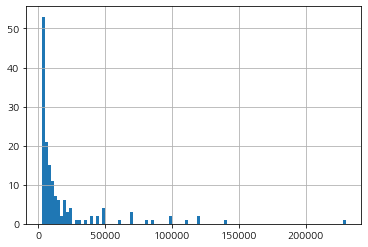

In [7]:
picher['연봉(2018)'].hist(bins=100) # 2018년 연봉 분포를 출력한다.

<AxesSubplot:>

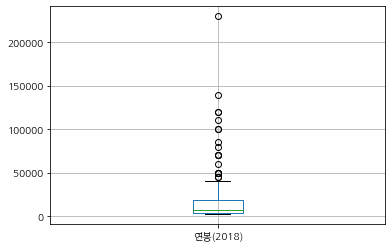

In [8]:
picher.boxplot(column=['연봉(2018)']) # 연봉의 상자 그림을 출력한다.

히스토그램에서는 연봉의 분포를 파악할 수 있으며, 상자 그림에서는 연봉의 일반적인 범주를 파악할 수 있다. 
다음으로 각각의 피처들은 어떤 특성을 가지고 있는지 살펴보자. 아래의 실행 결과는 '선수명'이나 '팀명'과 같이 그래프로 표현할 수 없는 피처들을 제외한 뒤, 모든 수치형 피처의 분포를 시각화한 것이다. 이를 통해 몇몇 피처들은 매우 불균형한 분포를 가지고 있다는 것을 알 수 있다.


- 회귀 분석에 사용할 피처 살펴보기


In [9]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

In [10]:
# 피처 각각에 대한 histogram을 출력한다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력한다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

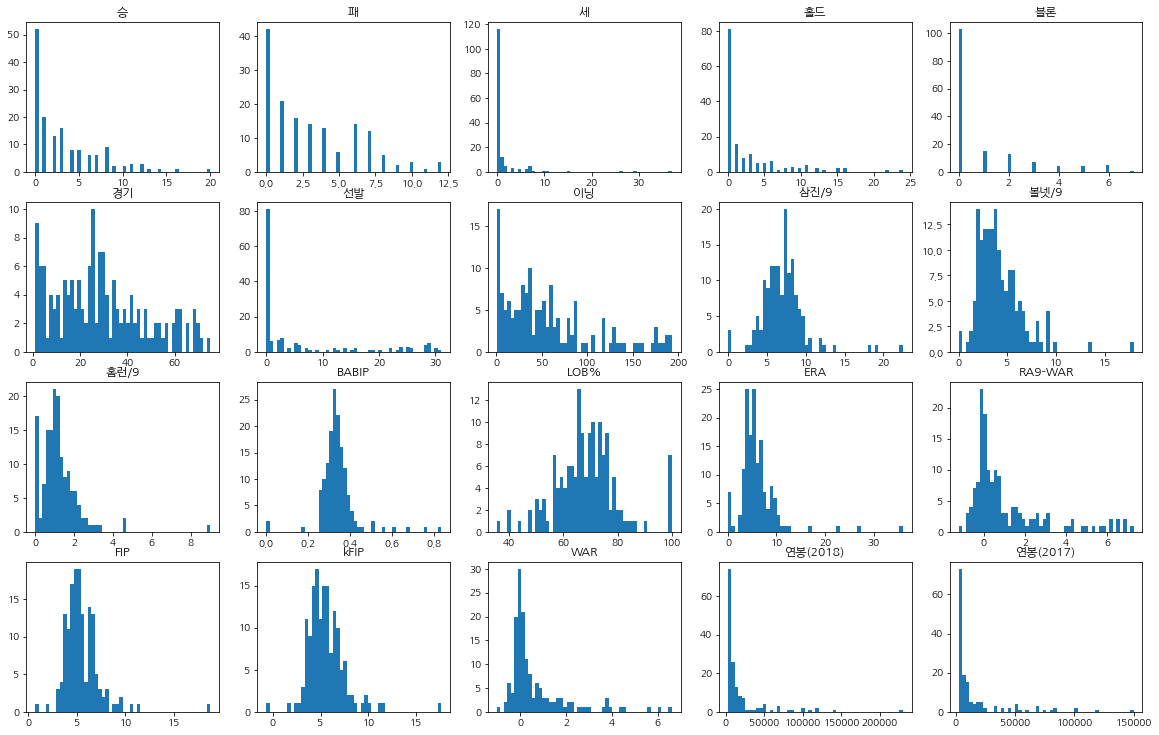

In [11]:
plot_hist_each_column(picher_features_df)

또 한 가지 그래프를 통해 알 수 있는 것은 각 피처 간의 단위가 다르다는 것이다. 예를 들어 홈런/9라는 피처는 x축이 0 ~ 8 사이의 값인 반면, 이닝이라는 피처는 0~200 사이의 값을 포함하고 있다. 이러한 데이터는 피처의 정규화 혹은 스케일링이 되어있지 않은 데이터이다.

### step.2 예측: 투수의 연봉 예측하기

다음 코드에서는 여러가지 피처 스케일링의 방법 중 표준화 방법을 적용하였다. 표준화는 정규분포에서의 z-값을 구하는 과정과 동일하다.

- 피처들의 단위 맞춰주기 : 피처 스케일링

In [12]:
# 판다스 형태로 정의된 데이터를 출력할 때 scientific-notation이 아닌 float 모양으로 출력되게 해준다.
pd.options.mode.chained_assignment = None

In [14]:
# 피처 각각에 대한 스케일링을 수행하는 함수를 정의한다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [15]:
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)

In [16]:
picher_df = picher_df.rename(columns={'연봉(2018)': 'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


연속형이 아닌 범주형 피처들은 어떻게 정규화할까? 범주형 피처에는 원-핫 인코딩이라는 방법을 적용해야 한다. 판다스에서는 get_dummies()라는 함수로 간단하게 원-핫 인코딩을 적용할 수 있다.

- 피처들의 단위 맞춰주기: 원-핫 인코딩

In [17]:
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis =1)
picher_df = picher_df.join(team_encoding)
team_encoding.head(5)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


이제 회귀 분석 모델을 학습시킬 준비가 거의 완료 되었다. 한 가지 더 준비할 것은 모델의 학습 데이터셋과 모델의 테스트 데이터셋으로 데이터를 분리하는 것이다. 파이썬에서는 sklearn이라는 모듈의 train_test_split() 함수로 이를 수행할 수 있다.

- 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [20]:
# 학습 데이터와 테스트 데이터로 분리한다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=19)

이제 회귀 분석을 수행하는 코드를 살펴보자. 다음 코드에서는 sklearn 라이브러리의 LinearRegression()으로 모델 오브젝트를 선언한 뒤, 해당 오브젝트에 model=lr.fit(X_train,y_train) 코드를 실행시킨다.

- 회귀 분석 계수 학습 & 학습된 계수 출력

In [21]:
# 회귀 분석 계수를 학습한다. (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 학습된 계수를 출력한다.
print(lr.coef_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]
